# Plotting MOF rates

### Loading modules

In [2]:
from matplotlib.pyplot import title,text,figure,show,plot,errorbar,subplots,xlabel,ylabel,subplots_adjust,savefig,gca,legend,xlim,ylim,annotate,locator_params
from matplotlib import rc
from numpy import loadtxt,arange,array,sqrt,linspace,append,nanmax
from mof_lattice import MOF_lattice,MOF_data,MOF
from os import listdir,getcwd,path,walk
from seaborn import color_palette,set_palette

In [3]:
color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [4]:
set_palette('colorblind')

In [5]:
%matplotlib notebook

#### Parameters
n: number of points <br/>
off: offset

In [6]:
n=100
off=0.0075

### Loading MOF calculated data

In [7]:
f=MOF("MOF_quench/20/")

### Temperature and chemical potential ranges

In [8]:
temp=linspace(f.path.min()-0.01,f.path.max()+0.01,n)
mu=f.mu*temp

### Calculating theoretical values

In [9]:
mof=MOF_lattice(f.length,f.E_s,f.E_m,f.E_t)
rho=mof.get_loading(mu,temp)

### Plotting the theoretical values

<IPython.core.display.Javascript object>


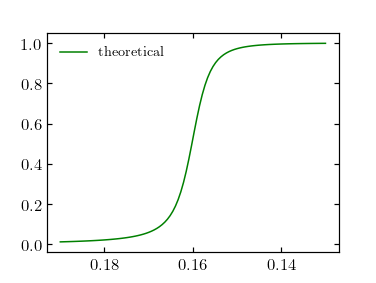

In [10]:
figure()
plot(temp,rho,'g-',linewidth=1.0,label=r"theoretical")
legend(frameon=False)
gca().invert_xaxis()
show()

### Folders to read

In [11]:
d=next(walk('.'))[1]
d=[a for a in d if a.isdigit()]
d=sorted(d,key=lambda x: int(x))

d=['10','11','12','13','15','20']
d=d[::-1]
b=[]
for a in d:
    b+=['MOF_quench/'+a]
d=b
print(d)

['MOF_quench/20', 'MOF_quench/15', 'MOF_quench/13', 'MOF_quench/12', 'MOF_quench/11', 'MOF_quench/10']


### Reading and plotting MOF data with various temperature ramp rates

<IPython.core.display.Javascript object>


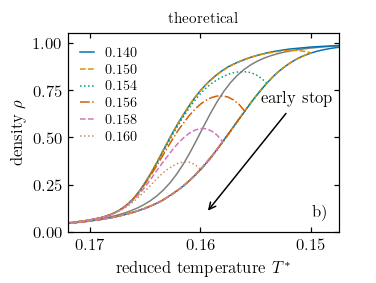

In [12]:
#plot(temp,rho,'g-',linewidth=1.0,label=r"theoretical")
fig,ax=subplots()

plot(temp,rho,alpha=0.5,color='k',linewidth=1.0)

ax.set_prop_cycle(color=color_palette('colorblind',6),linestyle=['-', '--', ':','-.','--',':'])

for a in d:
    f=MOF(a)
    #errorbar(f.path,f.rho.mean,yerr=sqrt(f.rho.var),linewidth=1.00,elinewidth=6.00,ecolor="y",barsabove=True,color="r",alpha=0.66)
    #ax1.vlines(f.path,ymin=f.rho.min,ymax=f.rho.max,linewidth=0.66,alpha=1.0)
    
    #l=float(f.isobar[0])/80.0*100
    t=(int(len(f.path)/2))
    l=(f.path[t-1])
    
    plot(f.path,f.rho.mean,
         #markersize=1.0,
         linewidth=1.0,
         #alpha=1.0,
         #label="$T^*={:.3f}$".format(l))
         label=r"${:.3f}$".format(l))

annotate(r"early stop",xy=(0.1595,0.1),xytext=(0.1545,0.7),
         arrowprops=dict(arrowstyle="->"),textcoords='data',va='center')

annotate(r"b)",xytext=(0.9,0.1),xy=(0.15,0.15),xycoords='axes fraction',va='center')
title(r"theoretical",fontsize=10)

legend(frameon=False,loc=2,handlelength=1,labelspacing=0.2)
xlim(f.path.min()+off,f.path.max()-off)
xlim(0.1475,0.172)
ylim(0,1.05)

gca().invert_xaxis()

xlabel(r"reduced temperature $T^*$")
ylabel(r"density $\rho$")

ax.xaxis.major.locator.set_params(nbins=3) 

subplots_adjust(left=0.18,bottom=0.18)
savefig("mof_quench.png")
savefig("mof_quench.pdf")

show()

In [14]:
import pandas as pd

In [15]:
xl_file=pd.ExcelFile('e-2-Mg2dobpdc_hysteresis-tests_final.xlsx')

In [16]:
print(xl_file.sheet_names)

['quench', 'rates', 'bare-Mg2dobpdc', 'e-2-Mg2dobpdc']


#### Read columns fce

In [17]:
def read_columns(a=[0,1],b=[4,5]):
    a1=pd.read_excel(xl_file,sheet_name='quench',usecols=a,header=8)
    a2=pd.read_excel(xl_file,sheet_name='quench',usecols=b,header=8)

    T1,rho1=a1.values.transpose()
    T2,rho2=a2.values.transpose()
    
    T=append(T1,T2)
    rho=append(rho1,rho2)
    
    return T,rho

In [18]:
_T=[]
_rho=[]
cols=[
    {'a':[0,1],'b':[4,5]},
    {'a':[32,33],'b':[36,37]},
    {'a':[24,25],'b':[28,29]},
    {'a':[16,17],'b':[20,21]},
    {'a':[8,9],'b':[12,13]}  
     ]
for a in cols:
    T,rho=read_columns(a=a['a'],b=a['b'])
    _T+=[T]
    _rho+=[rho]

#### Reading data

<IPython.core.display.Javascript object>


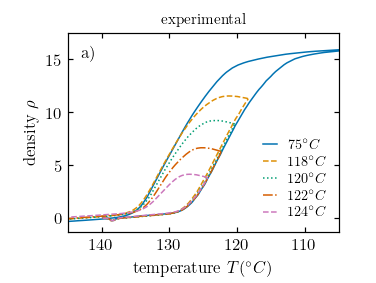

In [19]:
fig,ax=subplots()

ax.set_prop_cycle(color=color_palette('colorblind',6),linestyle=['-', '--', ':','-.','--',':'])

labels=['75','118','120','122','124']

for T,rho,label in zip(_T,_rho,labels):
    ax.plot(T,rho,
         linewidth=1.0,
         label=label+"${^\circ}C$")

legend(frameon=False,loc=4,handlelength=1,labelspacing=0.2)
xlim(105,145)

annotate(r"a)",xytext=(0.05,0.9),xy=(0.1,0.1),xycoords='axes fraction',va='center')

title(r"experimental",fontsize=10)

gca().invert_xaxis()

xlabel(r"temperature $T(^\circ C)$")
ylabel(r"density $\rho$")

subplots_adjust(left=0.18,bottom=0.18)
savefig("mof_quench_exp.png")
savefig("mof_quench_exp.pdf")
    
show()

# Plotting MOF rates

#### Parameters

n: number of points <br/>
off: offset

In [20]:
from matplotlib.pyplot import figure,show,plot,errorbar,subplots,xlabel,ylabel,subplots_adjust,savefig,gca,legend,xlim,annotate
from matplotlib import rc
from numpy import loadtxt,arange,array,sqrt,linspace,append,nanmax,log
from mof_lattice import MOF_lattice,MOF_data,MOF
from os import listdir,getcwd,path,walk
from seaborn import color_palette,set_palette

In [21]:
n=100
off=0.003

### Loading MOF calculated data

In [22]:
f=MOF("MOF_rates/400")

### Temperature and chemical potential ranges

In [23]:
temp=linspace(f.path.min()-0.01,f.path.max()+0.01,n)
mu=f.mu*temp

### Calculating theoretical values

In [24]:
mof=MOF_lattice(f.length,f.E_s,f.E_m,f.E_t)
rho=mof.get_loading(mu,temp)
corr_length=mof.correlation_length(mu,temp)

In [25]:
hess=mof.hessian(mu,temp)

### Plotting the theoretical values

<IPython.core.display.Javascript object>


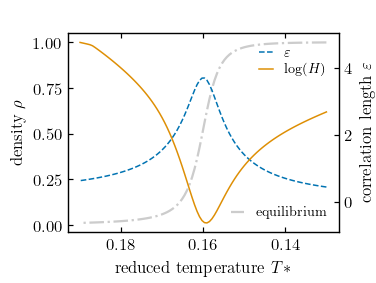

In [26]:
%matplotlib notebook

fig,ax1=subplots()

ax1.plot(temp,rho,'k-.',alpha=0.2,linewidth=1.5,label=r"equilibrium")
legend(frameon=False,loc=4,handlelength=1,labelspacing=0.2)

ylabel(r"density $\rho$")
xlabel(r"reduced temperature $T*$")

ax2=ax1.twinx()

ax2.plot(temp,corr_length,'--',linewidth=1.0,label=r"$\varepsilon$")

ax2.plot(temp,log(hess),linewidth=1.0,label=r"$\log(H)$")

legend(frameon=False,loc=1,handlelength=1,labelspacing=0.2)
gca().invert_xaxis()

xlabel(r"reduced temperature $T*$")
ylabel(r"correlation length $\varepsilon$")

subplots_adjust(left=0.18,bottom=0.18)

savefig('fluctuations.pdf')

show()

### Calculating correlation length

<IPython.core.display.Javascript object>


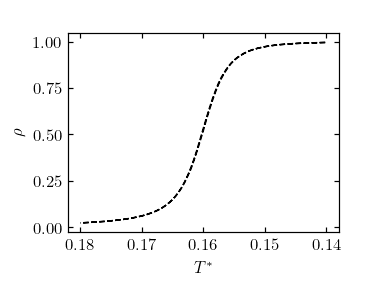

In [41]:
figure()

f=MOF('MOF_rates/12800/')
plot(f.path,f.rho.mean,'k--',linewidth=1.0)

xlabel(r"$T^*$")
ylabel(r"$\rho$")

subplots_adjust(left=0.18,bottom=0.18)
gca().invert_xaxis()

### Relaxation time calculation

fit with $1-\exp^{-t/\tau}$ 

(160, 200)


<IPython.core.display.Javascript object>


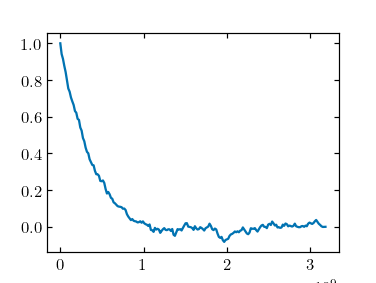

In [82]:
data=loadtxt('MOF_rates/12800/npart.dat')
en_data=loadtxt('MOF_rates/12800/energy.dat')
time=loadtxt('MOF_rates/12800/time.dat')

print(data.shape)

figure()
x=data[41]/4096.0
x_en=en_data[41]
t=time[41]
f=(x-x[0])/(x[-1]-x[0])
ff=1-f
f_en=(x_en-x_en[0])/(x_en[-1]-x_en[0])
plot(t,ff)

#### Folders to read

In [104]:
d=next(walk('MOF_rates'))[1]

d=['100','200','400']
b=[]
for a in d:
    b+=['MOF_rates/'+a]
d=b
print(d)

['MOF_rates/100', 'MOF_rates/200', 'MOF_rates/400']


### Reading and plotting MOF data with various temperature ramp rates

<IPython.core.display.Javascript object>


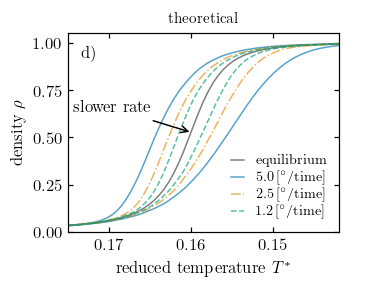

In [127]:
fig,ax=subplots()

plot(temp,rho,'k-',linewidth=1.0,alpha=0.5,label=r"equilibrium")

#ax.set_prop_cycle(color=color_palette('colorblind',3),linestyle=['--', ':', '-.'])
ax.set_prop_cycle(color=color_palette('colorblind',3),linestyle=['-','-.','--'])

for a in d:
    f=MOF(a)
    #errorbar(f.path,f.rho.mean,yerr=sqrt(f.rho.var),linewidth=1.00,elinewidth=6.00,ecolor="y",barsabove=True,color="r",alpha=0.66)
    #ax1.vlines(f.path,ymin=f.rho.min,ymax=f.rho.max,linewidth=0.66,alpha=1.0)
    plot(f.path,f.rho.mean,
         linewidth=1.0,
         markersize=1.0,
         alpha=0.66,
         label=r"$%.1lf\,[^\circ/\mathrm{time}]$"%(1e6*0.0005/(float(a[-3:]))))

annotate(r"slower rate",xy=(0.46,0.5),xytext=(0.02,.6),arrowprops=dict(arrowstyle="->"),xycoords='axes fraction')
annotate(r"d)",xytext=(0.05,0.9),xy=(0.1,0.1),xycoords='axes fraction',va='center')

title(r"theoretical",fontsize=10)

legend(frameon=False,loc=4,handlelength=1,labelspacing=0.2)
xlim(f.path.min()+off,f.path.max()-off)
ylim(0,1.05)
xlim(0.142,0.175)

gca().invert_xaxis()

ax.xaxis.major.locator.set_params(nbins=4) 

xlabel(r"reduced temperature $T^*$")
ylabel(r"density $\rho$")

subplots_adjust(left=0.18,bottom=0.18)
savefig("mof_rates.png")
savefig("mof_rates.pdf")

show()

In [130]:
import pandas as pd

In [131]:
xl_file=pd.ExcelFile('e-2-Mg2dobpdc_hysteresis-tests_final.xlsx')

In [132]:
print(xl_file.sheet_names)

['quench', 'rates', 'bare-Mg2dobpdc', 'e-2-Mg2dobpdc']


## Read columns fce

In [133]:
def read_columns(a=[0,1],b=[4,5]):
    a1=pd.read_excel(xl_file,sheet_name='rates',usecols=a,header=8)
    a2=pd.read_excel(xl_file,sheet_name='rates',usecols=b,header=8)

    T1,rho1=a1.values.transpose()
    T2,rho2=a2.values.transpose()
    
    T=append(T1,T2)
    rho=append(rho1,rho2)
    
    return T,rho

In [134]:
_T=[]
_rho=[]
cols=[
    {'a':[24,25],'b':[28,29]},
    {'a':[16,17],'b':[20,21]},
    {'a':[0,1],'b':[4,5]},    
    {'a':[8,9],'b':[12,13]}  
     ]
for a in cols:
    T,rho=read_columns(a=a['a'],b=a['b'])
    _T+=[T]
    _rho+=[rho]

## Plotting experimental data

<IPython.core.display.Javascript object>


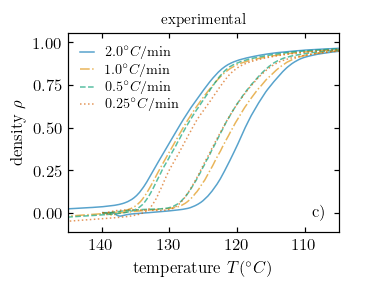

In [135]:
fig,ax=subplots()

ax.set_prop_cycle(color=color_palette('colorblind',6),linestyle=['-','-.','--',':',':',':'])

labels=['0.25','0.5','1.0','2.0']

for T,rho,label in zip(_T[::-1],_rho[::-1],labels[::-1]):
    m=(nanmax(rho))
    plot(T,rho/m,
         linewidth=1.0,
         alpha=0.66,
         label=label+"${^\circ}C/$min")

legend(frameon=False,loc=2,handlelength=1,labelspacing=0.2)


#annotate(r"c)",xytext=(0.05,0.9),xy=(0.1,0.1),xycoords='axes fraction',va='center')
annotate(r"c)",xytext=(0.9,0.1),xy=(0.15,0.15),xycoords='axes fraction',va='center')

title(r"experimental",fontsize=10)

gca().invert_xaxis()

xlabel(r"temperature $T(^\circ C)$")
ylabel(r"density $\rho$")

xlim(145,105)

subplots_adjust(left=0.18,bottom=0.18)
savefig("mof_rates_exp.png")
savefig("mof_rates_exp.pdf")
    
show()

### Schematics

<IPython.core.display.Javascript object>


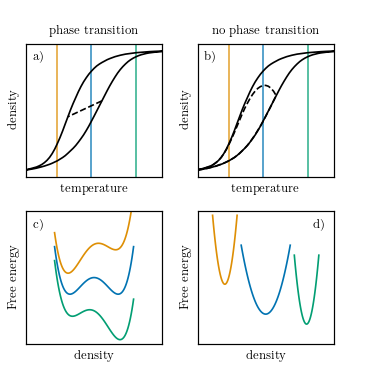

In [136]:
from numpy import take
a=color_palette('colorblind')

fig,ax=subplots(2,2,figsize=(3.4,3.4))

f0=MOF('MOF_quench/20/')
f1=MOF('MOF_quench/12/')

lw=1.11

ax[0,1].axvline(0.165,0,1,linewidth=lw,color=a[1],alpha=0.77)
ax[0,1].axvline(0.1585,0,1,linewidth=lw,color=a[0],alpha=0.77)
ax[0,1].axvline(0.15,0,1,linewidth=lw,color=a[2],alpha=0.77)

ax[0,1].plot(f1.path,f1.rho.mean,'k--',linewidth=lw)
ax[0,1].plot(f0.path,f0.rho.mean,'k-',linewidth=lw)

ax[0,1].set_xlim(0.171,0.145)
ax[0,1].set_ylim(0,1.05)
ax[0,1].set_title(r"no phase transition",fontsize=8)
ax[0,1].set_ylabel(r"density",fontsize=8)
ax[0,1].set_xlabel(r"temperature",fontsize=8)

ax[0,1].set_xticks([])
ax[0,1].set_yticks([])

fx=take(f0.path,[46,125])
fy=take(f0.rho.mean,[46,125])

ax[0,0].axvline(0.165,0,1,linewidth=lw,color=a[1],alpha=0.77)
ax[0,0].axvline(0.1585,0,1,linewidth=lw,color=a[0],alpha=0.77)
ax[0,0].axvline(0.15,0,1,linewidth=lw,color=a[2],alpha=0.77)

ax[0,0].plot(fx,fy,'k--',linewidth=lw)
ax[0,0].plot(f0.path,f0.rho.mean,'k-',linewidth=lw)

ax[0,0].set_xlim(0.171,0.145)
ax[0,0].set_ylim(0,1.05)
ax[0,0].set_title(r"phase transition",fontsize=8)
ax[0,0].set_ylabel(r"density",fontsize=8)
ax[0,0].set_xlabel(r"temperature",fontsize=8)

ax[0,0].set_xticks([])
ax[0,0].set_yticks([])




ax[1,0].set_xlabel(r"density",fontsize=8)
ax[1,0].set_ylabel(r"Free energy",fontsize=8)

ax[1,0].set_xticks([])
ax[1,0].set_yticks([])

x=linspace(0.21,0.79,100)

xx=(x-0.5)*4

c=1.
a=1
b=1

ax[1,0].plot(x,((a*xx)**4-(b*xx)**2)+1.,linewidth=lw)
ax[1,0].plot(x,((a*xx)**4-(b*xx)**2+x*c)+1.,linewidth=lw)
ax[1,0].plot(x,((a*xx)**4-(b*xx)**2-x*c)+1.,linewidth=lw)

ax[1,0].set_xlim(0,1)
ax[1,0].set_ylim(0,2)


ax[1,1].set_xlabel(r"density",fontsize=8)
ax[1,1].set_ylabel(r"Free energy",fontsize=8)

ax[1,1].set_xticks([])
ax[1,1].set_yticks([])

x=linspace(0.32,0.68,100)
ax[1,1].plot(x,(4*(x-0.5))**2+0.225,linewidth=lw)

x=linspace(0.11,0.29,100)
ax[1,1].plot(x,(8*(x-0.2))**2+0.45,linewidth=lw)

x=linspace(0.71,0.89,100)
ax[1,1].plot(x,(8*(x-0.8))**2+0.15,linewidth=lw)

ax[1,1].set_xlim(0,1)
ax[1,1].set_ylim(0,1)

ax[0,0].annotate(r"a)",xytext=(0.05,0.9),xy=(0.1,0.1),xycoords='axes fraction',va='center',fontsize=8)
ax[0,1].annotate(r"b)",xytext=(0.05,0.9),xy=(0.1,0.1),xycoords='axes fraction',va='center',fontsize=8)
ax[1,0].annotate(r"c)",xytext=(0.05,0.9),xy=(0.1,0.1),xycoords='axes fraction',va='center',fontsize=8)
ax[1,1].annotate(r"d)",xytext=(0.85,0.9),xy=(0.1,0.1),xycoords='axes fraction',va='center',fontsize=8)

savefig("schematics.pdf")
subplots_adjust(wspace=0.26,hspace=0.26,left=0.07,bottom=0.07)